**This note book covers Explanatory Data Analysis a crucial step in Data analytics process. Generally Data cleaning, manipulation, statistitical Analysis and visualizations.We will be using a car dataset from kaggle.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# importing the data
df = pd.read_csv("C:/Users/njoro/Desktop/SPSS ANALYSIS/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# Now since the data is loaded let us check the shape and if there any missing values
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"The data has {df.isnull().sum().sum()} missing values")
print(f"In more details here are the columns with missing values\n")
print(f"{df.isnull().sum()}")

The data has 11914 rows and 16 columns
The data has 3850 missing values
In more details here are the columns with missing values

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


Now Since there are missing values we have to deal with them

In [7]:
df = df.dropna()
# Confirm that there are no missing values
print(f"The data has {df.isnull().sum().sum()} missing values")

The data has 0 missing values


In [8]:
# So the next step is to clear any duplicates
duplicates = df[df.duplicated()]
print(f"The data has {duplicates.shape[0]} duplicated rows \n")
print("The rows are: ")
print(duplicates)

The data has 349 duplicated rows 

The rows are: 
         Make     Model  Year             Engine Fuel Type  Engine HP  \
14        BMW  1 Series  2013  premium unleaded (required)      230.0   
18       Audi       100  1992             regular unleaded      172.0   
20       Audi       100  1992             regular unleaded      172.0   
24       Audi       100  1993             regular unleaded      172.0   
25       Audi       100  1993             regular unleaded      172.0   
...       ...       ...   ...                          ...        ...   
11471  Subaru       WRX  2017  premium unleaded (required)      305.0   
11603   Volvo      XC60  2017             regular unleaded      302.0   
11604   Volvo      XC60  2017             regular unleaded      240.0   
11708  Suzuki       XL7  2008             regular unleaded      252.0   
11717  Suzuki       XL7  2008             regular unleaded      252.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of D

In [9]:
# Now remove the duplicates
df = df.drop_duplicates()

In [10]:
# Now we shall remove unwanted columns
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis = 1)

In [11]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [12]:
# Now we rename the variables
df = df.rename(columns = {"Engine HP":"HP",
                          "Engine Cylinders":"Cylinders",
                          "Transmission Type": "Type",
                          "highway MPG": "Highway_mpg",
                          "city mpg": "City_mpg"})

In [13]:
# so the next step is a short descriptive statistics
df.describe()

,Year,HP,Cylinders,Highway_mpg,City_mpg,MSRP
count,7735.00000,7735.000000,7735.000000,7735.00000,7735.000000,7.735000e+03
mean,2012.14958,277.632062,5.825469,26.52980,19.468649,5.102826e+04
std,6.23167,115.529955,1.895593,7.78492,7.231534,7.153777e+04
min,1990.00000,55.000000,0.000000,12.00000,7.000000,2.000000e+03
25%,2010.00000,194.000000,4.000000,22.00000,16.000000,2.622500e+04
50%,2015.00000,270.000000,6.000000,26.00000,18.000000,3.560000e+04
75%,2016.00000,325.000000,6.000000,30.00000,22.000000,4.947750e+04
max,2017.00000,1001.000000,16.000000,354.00000,137.000000,2.065902e+06


In [14]:
# Now I just want to know manual and automatic which have a higher horse power
df['HP'].groupby(df['Type']).mean()

# Just note that this is just me being curious it has nothing to do with the analysis
Make = df['HP'].groupby(df['Make']).max()
Make = Make.sort_values(ascending = False)
print(f"The Makes with the highest horsepower is: {Make.head()}")

The Makes with the highest horsepower is: Make
Bugatti        1001.0
Lamborghini     750.0
Ferrari         731.0
Dodge           707.0
Ford            662.0
Name: HP, dtype: float64


[]

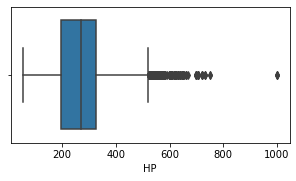

In [15]:
# Now we move to visualization
# We start by boxplot
plt.figure(figsize = (5, 2.5))
sns.boxplot(x = df['HP'])
plt.plot()


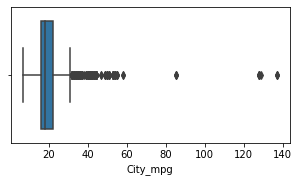

In [16]:
plt.figure(figsize = (5, 2.5))
sns.boxplot(x = df['City_mpg'])
plt.show()

[]

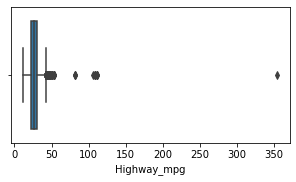

In [17]:
plt.figure(figsize = (5, 2.5))
sns.boxplot(x = df['Highway_mpg'])
plt.plot()

Year               4.00
HP               106.00
Cylinders          2.00
Highway_mpg        7.00
City_mpg           5.00
MSRP           17433.75
dtype: float64


C:\Users\njoro\AppData\Local\Temp\ipykernel_12660\1838341049.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


<AxesSubplot:xlabel='Cylinders'>

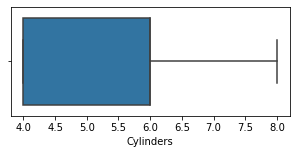

In [21]:
# It is quite clear that we have numerous outliers now let me show you how we deal with it
# So we remove values above the 3rd quantile and below the 1st quantile
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

plt.figure(figsize = (5, 2))
sns.boxplot(x = df.Cylinders)
# And thats how you remove outliers

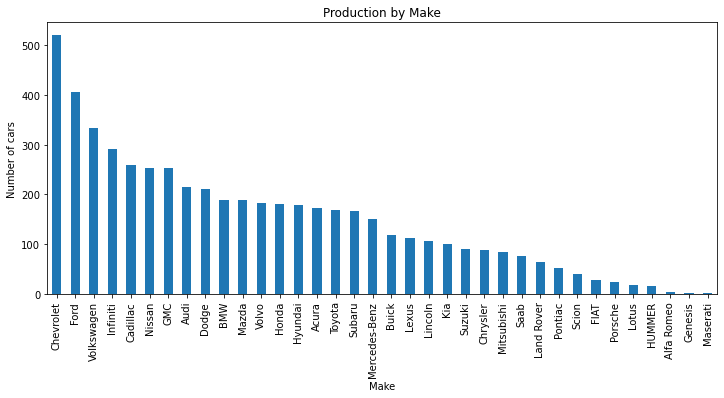

In [22]:
# Next we plot the make of the car and the number of cars
df['Make'].value_counts().plot(kind = "bar", figsize = (12, 5))
plt.xlabel("Make")
plt.ylabel("Number of cars")
plt.title("Production by Make")
plt.show()

Correlation Results 
:                  Year        HP  Cylinders  Highway_mpg  City_mpg      MSRP
Year         1.000000  0.089404  -0.204169     0.340863  0.319862  0.203460
HP           0.089404  1.000000   0.759051    -0.544279 -0.638864  0.721604
Cylinders   -0.204169  0.759051   1.000000    -0.729623 -0.771347  0.452623
Highway_mpg  0.340863 -0.544279  -0.729623     1.000000  0.920919 -0.265418
City_mpg     0.319862 -0.638864  -0.771347     0.920919  1.000000 -0.340790
MSRP         0.203460  0.721604   0.452623    -0.265418 -0.340790  1.000000


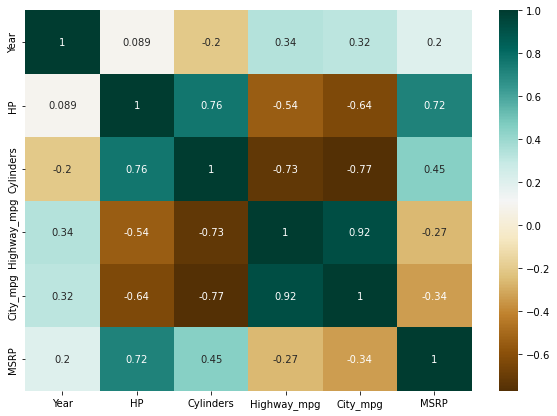

In [26]:
# Now a heat map
c = df.corr()
print(f"Correlation Results \n: {c}")
plt.figure(figsize = (10, 7))
sns.heatmap(c, cmap = "BrBG", annot = True)
plt.show()

# So thats it for EDA a rather brush through